<a href="https://colab.research.google.com/github/FatherOfLove/RL/blob/main/Clustering_final_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**data**

In [ ]:
#pip install yahoo-finance

In [ ]:
pip install yfinance

In [ ]:
#pip install get-all-tickers

In [ ]:
import pandas as pd
import yfinance as yf
import datetime
import time
import requests
import io

In [ ]:
start = datetime.datetime(2018,1,1)
end = datetime.datetime(2020,11,25)

In [ ]:
url="https://pkgstore.datahub.io/core/nasdaq-listings/nasdaq-listed_csv/data/7665719fb51081ba0bd834fde71ce822/nasdaq-listed_csv.csv"
s = requests.get(url).content
companies = pd.read_csv(io.StringIO(s.decode('utf-8')))


In [ ]:
companies.head()

,Symbol,Company Name,Security Name,Market Category,Test Issue,Financial Status,Round Lot Size
0,AAIT,iShares MSCI All Country Asia Information Tech...,iShares MSCI All Country Asia Information Tech...,G,N,N,100.0
1,AAL,"American Airlines Group, Inc.","American Airlines Group, Inc. - Common Stock",Q,N,N,100.0
2,AAME,Atlantic American Corporation,Atlantic American Corporation - Common Stock,G,N,N,100.0
3,AAOI,"Applied Optoelectronics, Inc.","Applied Optoelectronics, Inc. - Common Stock",G,N,N,100.0
4,AAON,"AAON, Inc.","AAON, Inc. - Common Stock",Q,N,N,100.0


In [ ]:
companies.shape

(2967, 7)

In [ ]:
Symbols = companies['Symbol'].tolist()

In [ ]:
len(Symbols)

2967

In [ ]:
stock_final = pd.DataFrame()
# iterate over each symbol
for i in Symbols:  
    
    # print the symbol which is being downloaded
    print( str(Symbols.index(i)) + str(' : ') + i, sep=',', end=',', flush=True)  
    
    try:
        # download the stock price 
        stock = []
        stock = yf.download(i,start=start, end=end, progress=False)
        
        # append the individual stock prices 
        if len(stock) == 0:
            None
        else:
            stock['Name']=i
            stock_final = stock_final.append(stock,sort=False)
    except Exception:
        None

0 : AAIT,1 : AAL,2 : AAME,3 : AAOI,4 : AAON,5 : AAPL,6 : AAVL,7 : AAWW,8 : AAXJ,9 : ABAC,
1 Failed download:
- ABAC: No data found for this date range, symbol may be delisted
10 : ABAX,11 : ABCB,12 : ABCD,13 : ABCO,14 : ABCW,
1 Failed download:
- ABCW: No data found for this date range, symbol may be delisted
15 : ABDC,
1 Failed download:
- ABDC: No data found, symbol may be delisted
16 : ABGB,
1 Failed download:
- ABGB: No data found for this date range, symbol may be delisted
17 : ABIO,18 : ABMD,19 : ABTL,
1 Failed download:
- ABTL: No data found for this date range, symbol may be delisted
20 : ABY,
1 Failed download:
- ABY: No data found for this date range, symbol may be delisted
21 : ACAD,22 : ACAS,
1 Failed download:
- ACAS: No data found for this date range, symbol may be delisted
23 : ACAT,
1 Failed download:
- ACAT: No data found for this date range, symbol may be delisted
24 : ACET,25 : ACFC,26 : ACFN,27 : ACGL,28 : ACHC,29 : ACHN,
1 Failed download:
- ACHN: No data found, sy

In [ ]:
stock_final.Name.unique()


array(['AAIT', 'AAL', 'AAME', ..., 'ZN', 'ZNGA', 'ZUMZ'], dtype=object)

In [ ]:
#! zip stock_final_11Oct2020.zip *.csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
stock_final.Name.nunique()


2003

In [ ]:
stock_final.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2018-01-02,0.145,0.155,0.145,0.151,0.151,498275.0,AAIT
2018-01-03,0.153,0.153,0.152,0.153,0.153,211100.0,AAIT
2018-01-04,0.153,0.153,0.152,0.152,0.152,423186.0,AAIT
2018-01-08,0.151,0.151,0.150,0.150,0.150,140881.0,AAIT
2018-01-09,0.152,0.158,0.152,0.153,0.153,2649386.0,AAIT


In [ ]:
stock_final.reset_index(inplace=True)

In [ ]:
stock_final.to_csv('stock_final_2018-2020.csv', index = True)

In [ ]:
/content/stock_final_2018-2020.csv

In [ ]:
stock_final= pd.read_csv('/content/stock_final_2018-2020.csv')

In [ ]:
stock_final.shape

(1367420, 9)

In [ ]:
stock_final.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Name
0,0,2018-01-02,0.145,0.155,0.145,0.151,0.151,498275.0,AAIT
1,1,2018-01-03,0.153,0.153,0.152,0.153,0.153,211100.0,AAIT
2,2,2018-01-04,0.153,0.153,0.152,0.152,0.152,423186.0,AAIT
3,3,2018-01-08,0.151,0.151,0.150,0.150,0.150,140881.0,AAIT
4,4,2018-01-09,0.152,0.158,0.152,0.153,0.153,2649386.0,AAIT


In [ ]:
list(stock_final.columns) 


['Unnamed: 0',
 'Date',
 'Open',
 'High',
 'Low',
 'Close',
 'Adj Close',
 'Volume',
 'Name']

In [ ]:
#stock_final['year'] = stock_final['Date'].dt.year

In [ ]:
stock_final.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Name,year
0,2018-01-02,0.145,0.155,0.145,0.151,0.151,498275.0,AAIT,2018
1,2018-01-03,0.153,0.153,0.152,0.153,0.153,211100.0,AAIT,2018
2,2018-01-04,0.153,0.153,0.152,0.152,0.152,423186.0,AAIT,2018
3,2018-01-08,0.151,0.151,0.150,0.150,0.150,140881.0,AAIT,2018
4,2018-01-09,0.152,0.158,0.152,0.153,0.153,2649386.0,AAIT,2018


#**cluster**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
from dateutil.relativedelta import relativedelta

%matplotlib inline 

pd.set_option('display.max_columns', 100)

# Introduction
I wanted to invest my money in the stock market, but there were too many stocks to choose from. I would like to segment the thousands of stocks that are available and filter out the group of better performing stocks. I shall attempt to use K-means clustering to solve this problem.

### What is K-means clustering?
K-means clustering is a type of unsupervised learning model. Unsupervised models are used to learn from a data set that is not labeled or classified. It identifies commonalities in the data set and react based on the presence or absence of such commonalities in each data point.

The objective of this model is to form clusters in the data set, with the number of clusters represented by the variable K. Data points are assigned to one of the K groups based on feature similarity.

### How does K-means clustering works?
1. K number of cluster centroids are initialized randomly
2. Data points that are near to the cluster centroids are assigned to that cluster
3. The centroids will then move to the average point in the cluster and the data points will be re-assigned again
4. Step 1 and 2 will be repeated until there is no change in the clusters.

# Data Transformation
We have decided to use annual returns and variance as my variables as they informed users of the stock performance and its volatility. To narrow down my scope, We would be using stocks listed on NASDAQ.

In [ ]:
df_stock = (
    stock_final
    .pipe(lambda x: x.assign(year=pd.to_datetime(x.Date).dt.year))
    .query("year >= 2018")
    [['Name', 'Date', 'year', 'Open', 'Close']]
)

In [ ]:
df_stock.head()

,Name,Date,year,Open,Close
0,AAIT,2018-01-02,2018,0.145,0.151
1,AAIT,2018-01-03,2018,0.153,0.153
2,AAIT,2018-01-04,2018,0.153,0.152
3,AAIT,2018-01-08,2018,0.151,0.150
4,AAIT,2018-01-09,2018,0.152,0.153


I would like to obtain the annual performance of each stock to calculate the average annual return and variance.

### For those who are unfamiliar, average yearly return can be calculated in 3 steps:
1. Calculate annual return of each year by subtracting the closing price of a stock on the last trading day in the year with the opening price of the same stock on the first trading day in the same year.
2. Divide the value in step 1 by the opening price of the stock on the first trading day in the same year. You would obtain the annual return for that year. Repeat step 1 and 2 for X number of years you have.
3. Sum up all the annual returns in the stated time period and divide the value by X number of years.

### To calculate variance:
1. subtract each year's annual return with the average annual return and square that value. 
2. Sum all the values in step 1 and divide it by X years.

As such, I would need to transform my data set to based on the above parameters to obtain my desired variables. 

In [ ]:
df_stock.shape

(1367420, 5)

In [ ]:
df_stock= df_stock.dropna()

In [ ]:
df_stock.shape

(1367413, 5)

In [ ]:
# getting the first day and last day of each year that is available in the dataset
first_date_list = [df_stock.query("year == '{}'".format(2018+i)).Date.min() for i in range(6)]
last_date_list = [df_stock.query("year == '{}'".format(2018+i)).Date.max() for i in range(6)]
first_date_df =pd.DataFrame({"Date": first_date_list}) 
last_date_df = pd.DataFrame({"Date": last_date_list})

In [ ]:
first_date_df.head()

,Date
0,2018-01-02
1,2019-01-02
2,2020-01-02
3,NaN
4,NaN


In [ ]:
df_stock['Date'] = df_stock['Date'].astype(str)
first_date_df['Date'] = first_date_df['Date'].astype(str)
last_date_df['Date'] = last_date_df['Date'].astype(str)


In [ ]:
# filtering for the first day data
first_date_2018_2020_df = (
    df_stock
    .merge(first_date_df, on='Date', how='inner')
    .pipe(lambda x: x.assign(year=x.Date.str[:4]))
    .rename(columns={"Open": "open_first_day"})
    .reset_index(drop=True)
    [['Name', 'year', 'open_first_day']]
    .pivot_table(values='open_first_day', columns='year', index='Name', aggfunc='sum')
    .rename_axis(None, axis=1)
    .reset_index()
)

# filtering last day data 
last_date_2018_2020_df = (
    df_stock
    .merge(last_date_df, on='Date', how='inner')
    .pipe(lambda x: x.assign(year=x.Date.str[:4]))
    .rename(columns={"Close": "close_last_day"})
    .reset_index(drop=True)
    [['Name', 'year', 'close_last_day']]
    .pivot_table(values='close_last_day', columns='year', index='Name', aggfunc='sum')
    .rename_axis(None, axis=1)
    .reset_index()
)

In [ ]:
agg_first_date_df = (
    first_date_2018_2020_df
    .melt(id_vars='Name', value_vars=['2018', '2019','2020'])
    .rename(columns={"variable": "year", "value": "open_first_day"})
)

agg_last_date_df = (
    last_date_2018_2020_df
    .melt(id_vars='Name', value_vars=['2018', '2019','2020'])
    .rename(columns={"variable": "year", "value": "close_last_day"})
)

In [ ]:
agg_first_date_df.head()

,Name,year,open_first_day
0,AAIT,2018,0.145000
1,AAL,2018,52.330002
2,AAME,2018,3.460000
3,AAOI,2018,37.799999
4,AAON,2018,36.950001


In [ ]:
agg_first_date_df.isnull().sum()

Name                0
year                0
open_first_day    274
dtype: int64

In [ ]:
agg_first_date_df= agg_first_date_df.dropna()

In [ ]:
agg_first_date_df.isnull().sum()

Name              0
year              0
open_first_day    0
dtype: int64

In [ ]:
agg_last_date_df.isnull().sum()

Name                0
year                0
close_last_day    167
dtype: int64

In [ ]:
agg_last_date_df= agg_last_date_df.dropna()

In [ ]:
agg_last_date_df.isnull().sum()

Name              0
year              0
close_last_day    0
dtype: int64

In [ ]:
first_date_2018_2020_df.head()

,Name,2018,2019,2020
0,AAIT,0.145000,0.099000,0.089000
1,AAL,52.330002,31.459999,28.980000
2,AAME,3.460000,2.430000,1.990000
3,AAOI,37.799999,15.000000,12.130000
4,AAON,36.950001,34.570000,49.830002


In [ ]:
# calculating yearly return and then averaging them to get average yearly returns for each stock
agg_gains_df = (
    agg_first_date_df
    .merge(agg_last_date_df, on=['Name', 'year'], how='inner')
    .pipe(lambda x: x.assign(gains_dollar=x.close_last_day-x.open_first_day))
    .pipe(lambda x: x.assign(gains_pctg=x.gains_dollar/x.open_first_day))
    .groupby("Name")
    .agg({"gains_pctg": "mean"})
    .reset_index()
    .rename(columns={"gains_pctg": "avg_yearly_returns"})
)

# calculating overall variance using each year's return
agg_var_df = (
    agg_first_date_df
    .merge(agg_last_date_df, on=['Name', 'year'], how='inner')
    .pipe(lambda x: x.assign(gains_dollar=x.close_last_day-x.open_first_day))
    .pipe(lambda x: x.assign(gains_pctg=x.gains_dollar/x.open_first_day))
    [['Name', 'gains_pctg']]
    .groupby("Name")
    .agg(np.var)
    .reset_index()
    .rename(columns={"gains_pctg": "yearly_variance"})
)

agg_df3 = (
    agg_gains_df
    .merge(agg_var_df, on='Name', how='inner')
)

In [ ]:
agg_df3.head()

,Name,avg_yearly_returns,yearly_variance
0,AAIT,-0.271006,0.007692
1,AAL,-0.321124,0.043244
2,AAME,-0.147506,0.032589
3,AAOI,-0.382566,0.037727
4,AAON,0.239561,0.065352


In [ ]:
agg_df3.isnull().sum()

Name                   0
avg_yearly_returns     0
yearly_variance       50
dtype: int64

In [ ]:
agg_df3= agg_df3.dropna()

In [ ]:
agg_df3.isnull().sum()

Name                  0
avg_yearly_returns    0
yearly_variance       0
dtype: int64

In [ ]:
agg_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1832 entries, 0 to 1881
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                1832 non-null   object 
 1   avg_yearly_returns  1832 non-null   float64
 2   yearly_variance     1832 non-null   float64
dtypes: float64(2), object(1)
memory usage: 57.2+ KB


1832 stocks will be used for this study.

# Modelling

### Evaluation
Typically, two metrics are used to evaluate a K-means model. 
1. Sum of square errors (SSE) within clusters
2. Silhouette score.

SSE within clusters is derived by summing up the squared distance between each data point and its closest centroid. The goal is to reduce the error value. The intuition behind this is that we would want the distance of each data point to be as close as possible to the centroid. If the error is small, it would mean that the data points in the same cluster are relatively similar. As the number of centroids (clusters) increase, the error value will decrease. As such we would need to rely on the next metric to ensure that we are not introducing too many centroids (clusters) in the model.

Silhouette score is a measure of how similar the data point is to its own cluster compared to other clusters. The value ranges from -1 (worst score) to 1 (best score). A negative value would mean that data points are wrongly clustered while values near 0 would mean that there are overlapping clusters.

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn import metrics

In [ ]:
def plot_cluster(df, max_loop=50):
    """
    Looking at the performance of various number of clusters using K-Means.
    Performance is evaluated by within cluster SSE and silhouette score.
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,1:]
    
    # robust scaling is used so that the centering and scaling statistics are therefore not influenced by a few number of very large marginal outliers as they are based on percentiles
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    
    sse_within_cluster = {}
    silhouette_score = {}
    
    for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10, n_jobs=-1)
        kmeans.fit(X_rb)
        sse_within_cluster[k] = kmeans.inertia_
        silhouette_score[k] = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)

    _ = plt.figure(figsize=(10,6))
    ax1 = plt.subplot(211)
    _ = plt.plot(list(sse_within_cluster.keys()), list(sse_within_cluster.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("SSE Within Cluster")
    _ = plt.title("Within Cluster SSE After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    ax2 = plt.subplot(212)
    _ = plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("Silhouette Score")
    _ = plt.title("Silhouette Score After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

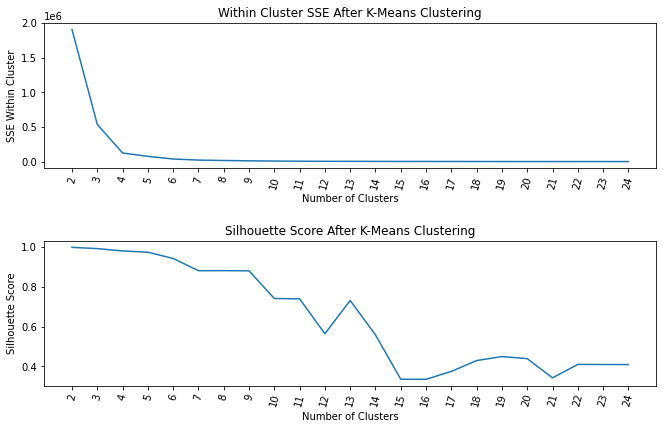

In [ ]:
plot_cluster(agg_df3, max_loop=25)

In [ ]:
def apply_cluster(df, clusters=2):
    """
    Applying K-Means with the optimal number of clusters identified
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,1:]
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    kmeans = KMeans(n_clusters=clusters, random_state=10, n_init=10, n_jobs=-1)  
    kmeans.fit(X_rb) 
    score = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)
    df['cluster'] = kmeans.labels_
    sse_within_cluster = kmeans.inertia_
    %matplotlib inline
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 10), dpi=150)
    y_km = kmeans.fit_predict(X_rb)
    plt.scatter(X_rb[y_km == 0, 0], X_rb[y_km == 0, 1], s=50, c='lightgreen', marker='s', edgecolor='black',label='cluster 0')
    plt.scatter(X_rb[y_km == 1, 0], X_rb[y_km == 1, 1], s=50, c='orange', marker='o', edgecolor='black', label='cluster 1') 
    plt.scatter(X_rb[y_km == 2, 0], X_rb[y_km == 2, 1], s=50, c='pink', marker='v', edgecolor='black', label='cluster 2')
    plt.scatter(X_rb[y_km == 3, 0], X_rb[y_km == 3, 1], s=50, c='yellow', marker='+', edgecolor='black', label='cluster 3')
    plt.scatter(X_rb[y_km == 4, 0], X_rb[y_km == 4, 1], s=50, c='red', marker='*', edgecolor='black', label='cluster 4')
    plt.scatter(X_rb[y_km == 5, 0], X_rb[y_km == 5, 1], s=50, c='green', marker='>', edgecolor='black', label='cluster 5')
    plt.scatter(X_rb[y_km == 6, 0], X_rb[y_km == 6, 1], s=50, c='blue', marker='4', edgecolor='black', label='cluster 6')
    plt.scatter(X_rb[y_km == 7, 0], X_rb[y_km == 7, 1], s=50, c='grey', marker='P', edgecolor='black', label='cluster 7')
    plt.scatter(X_rb[y_km == 8, 0], X_rb[y_km == 8, 1], s=50, c='purple', marker='D', edgecolor='black', label='cluster 8')
    plt.scatter(X_rb[y_km == 9, 0], X_rb[y_km == 9, 1], s=50, c='lightblue', marker='d', edgecolor='black', label='cluster 9')
    plt.xlim(0, 40)
    plt.ylim(0, 400)
    plt.legend(scatterpoints=1)
    plt.grid()
    plt.show()
    print("clustering performance")
    print("-----------------------------------")
    print("silhouette score: " + str(score.round(2)))
    print("sse withing cluster: " + str(sse_within_cluster.round()))
    return df

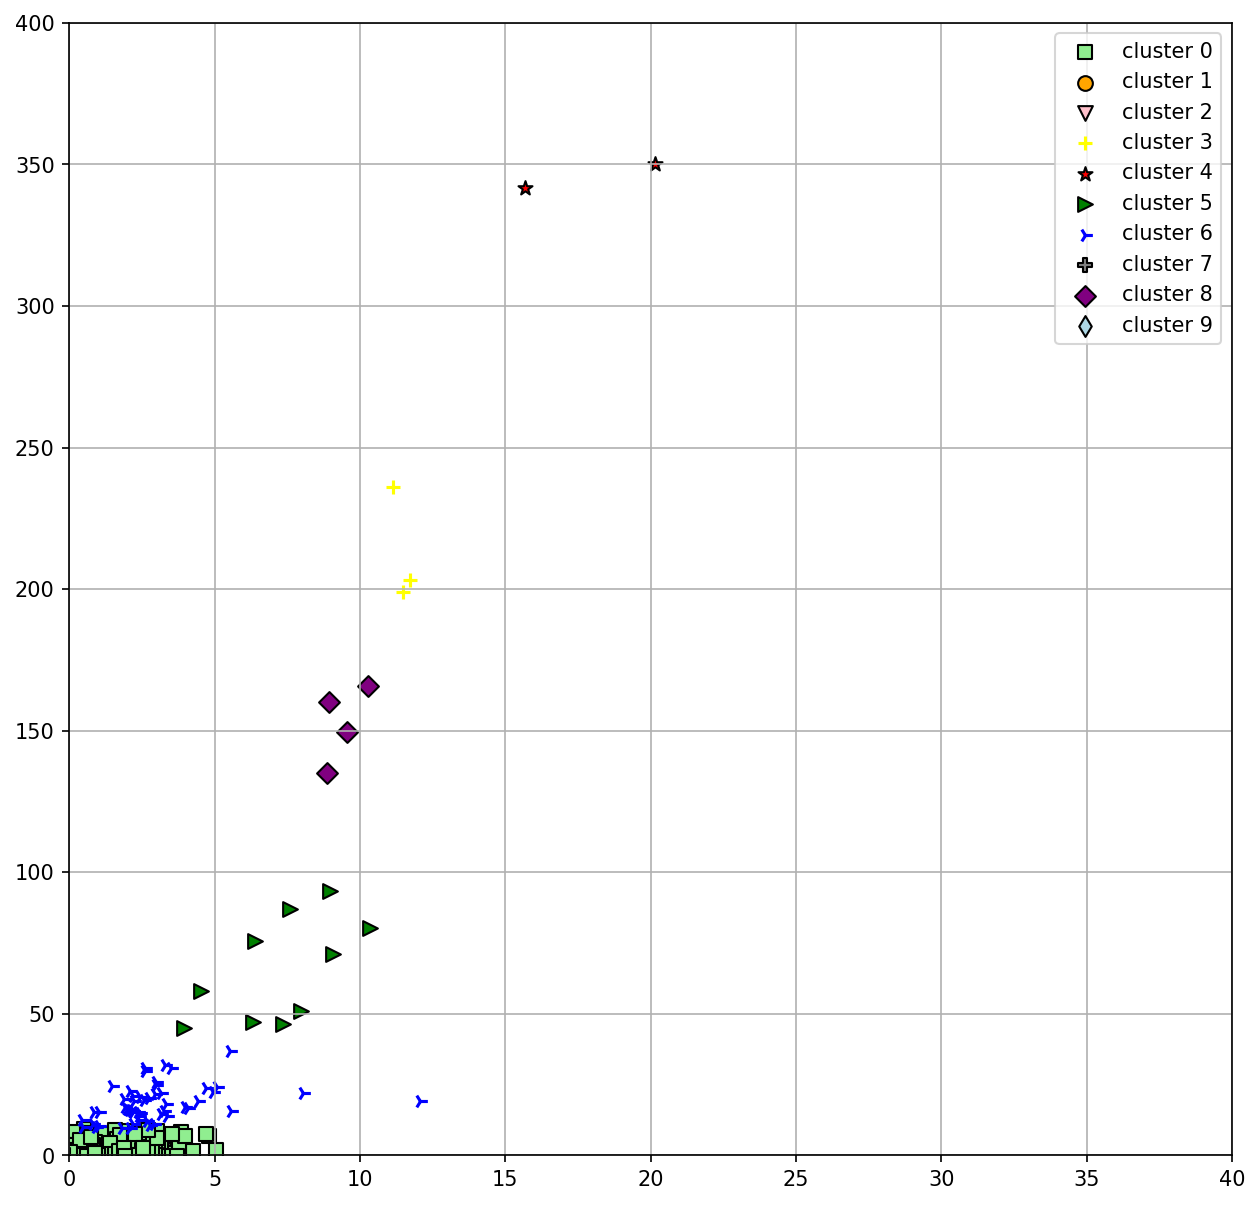

clustering performance
-----------------------------------
silhouette score: 0.88
sse withing cluster: 11919.0


In [ ]:
first_trial = apply_cluster(agg_df3, clusters=9)

In [ ]:
cluster_perf_df = (
    first_trial
    .groupby('cluster')
    .agg({"avg_yearly_returns":"mean", "yearly_variance":"mean", "Name":"count"})
    .sort_values('avg_yearly_returns')
    .reset_index()
)

cluster_perf_df

,cluster,avg_yearly_returns,yearly_variance,Name
0,0,0.038195,0.183473,1757
1,6,0.805757,3.781981,53
2,5,1.964546,13.359305,10
3,8,2.542706,31.014494,4
4,3,3.091559,43.180021,3
5,4,4.824267,70.201719,2
6,2,6.772231,158.533741,1
7,7,7.501288,178.137111,1
8,1,22.711428,1607.291476,1


From the dataframe above, we can see that the distribution of the stocks amongst the clusters is very skewed. Most of the stocks are aggregated in cluster `0`. For the other clusters, we can see that the `avg_yearly_returns` and `variance` are huge. A savvy investor would definitely not invest in these other clusters as the swing is too big, ranging from ~102% to 65100%. As such, he/she would most probably invest in a stock in cluster 0. As cluster 0 still contains too many stocks to choose from, I will attempt to conduct another K-Means clustering on cluster `0`.

In [ ]:
# creating a dataframe that only consists of cluster `0`
agg_df3_sub = agg_df3.query("cluster == 0").reset_index(drop=True)

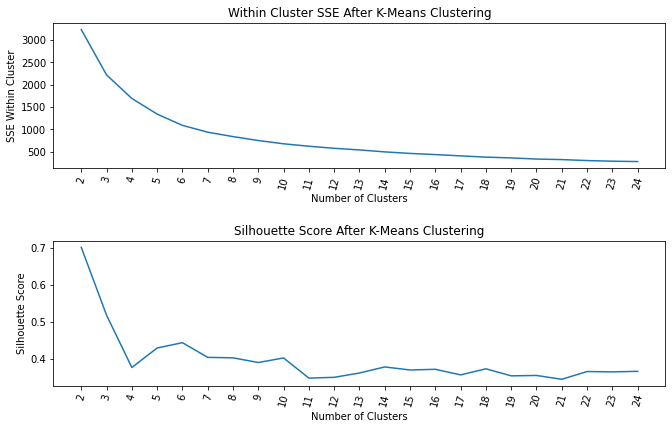

In [ ]:
plot_cluster(agg_df3_sub, max_loop=25)

From the second graph, `Silhouette Score After K-Means Clustering`, we can see that there was a steep drop in silhouette score between 5 clusters and 6 clusters. As such, I would use 5 clusters in my K-Means model below.

In [ ]:
def apply_cluster(df, clusters=2):
    """
    Applying K-Means with the optimal number of clusters identified
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,1:]
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    kmeans = KMeans(n_clusters=clusters, random_state=10, n_init=10, n_jobs=-1)  
    kmeans.fit(X_rb) 
    score = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)
    df['cluster'] = kmeans.labels_
    sse_within_cluster = kmeans.inertia_
    %matplotlib inline
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 10), dpi=80)
    y_km = kmeans.fit_predict(X_rb)
    plt.scatter(X_rb[y_km == 0, 0], X_rb[y_km == 0, 1], s=50, c='lightgreen', marker='s', edgecolor='black',label='cluster 0')
    plt.scatter(X_rb[y_km == 1, 0], X_rb[y_km == 1, 1], s=50, c='orange', marker='o', edgecolor='black', label='cluster 1') 
    plt.scatter(X_rb[y_km == 2, 0], X_rb[y_km == 2, 1], s=50, c='pink', marker='v', edgecolor='black', label='cluster 2')
    plt.scatter(X_rb[y_km == 3, 0], X_rb[y_km == 3, 1], s=50, c='yellow', marker='+', edgecolor='black', label='cluster 3')
    plt.scatter(X_rb[y_km == 4, 0], X_rb[y_km == 4, 1], s=50, c='red', marker='*', edgecolor='black', label='cluster 4')
    plt.scatter(X_rb[y_km == 5, 0], X_rb[y_km == 5, 1], s=50, c='green', marker='>', edgecolor='black', label='cluster 5')
    plt.xlim(0, 7)
    plt.ylim(0, 20)
    plt.legend(scatterpoints=1)
    plt.grid()
    plt.show()
    print("clustering performance")
    print("-----------------------------------")
    print("silhouette score: " + str(score.round(2)))
    print("sse withing cluster: " + str(sse_within_cluster.round()))
    return df

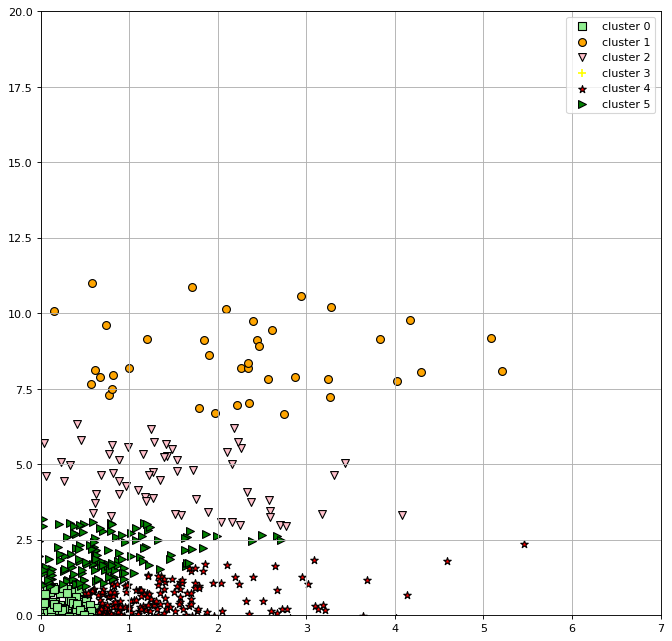

clustering performance
-----------------------------------
silhouette score: 0.44
sse withing cluster: 1092.0


In [ ]:
second_trial= apply_cluster(agg_df3_sub, clusters=6)

In [ ]:
sub_cluster_perf_df = (
    second_trial
    .groupby('cluster')
    .agg({"avg_yearly_returns":"mean", "yearly_variance":"mean", "Name":"count"})
    .sort_values('avg_yearly_returns')
    .reset_index()
)

sub_cluster_perf_df

,cluster,avg_yearly_returns,yearly_variance,Name
0,3,-0.380375,0.096733,208
1,0,-0.007581,0.063594,984
2,5,0.105799,0.408778,204
3,2,0.284402,0.842208,75
4,4,0.359156,0.130867,246
5,1,0.560519,1.522883,40


From the dataframe above, we can see that cluster `0` and cluster `4` would be the 2 better clusters to invest, amongst the rest. I decided to add in Sharpe Ratio as a metric to better evaluate the cluster performance.

### What is Sharpe Ratio?
Sharpe Ratio is used to help investors understand the return of an investment compared to its risk. The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. It is derived using annual returns, variance and risk-free rate. A Sharpe Ratio of more than 1 is considered good while a Sharpe Ratio of more than 2 is considered very good.

### How to compute Sharpe Ratio?
Sharpe Ratio can be computed as such:

**$Sharpe\ Ratio = (R_s - R_f) /{SD_s}$**

I will be using the first day of the year, 3-years daily U.S. yield rates, from https://home.treasury.gov/ as the risk-free rate.

In [ ]:
# calculating the average risk free rate over the time period of 2018 - 2020 
us_yield_curve_3years_dict = {"year": ['2018', '2019','2020'],
                         "risk_free_rate": [2.25, 2.49, 1.67]}
us_yield_curve_3years_df = pd.DataFrame.from_dict(us_yield_curve_3years_dict)

avg_risk_free_rate = (
    us_yield_curve_3years_df
    .mean()
    [['risk_free_rate']]
    [0]
)

In [ ]:
def get_sharpe_ratio_df(df):
    """
    Computing Sharpe Ratio
    """
    df_w_sharpe_ratio = (
        df
        .pipe(lambda x: x.assign(avg_risk_free_rate=avg_risk_free_rate/100))
        .pipe(lambda x: x.assign(std_dev=np.sqrt(x.yearly_variance)))
        .pipe(lambda x: x.assign(sharpe_ratio=(x.avg_yearly_returns-x.avg_risk_free_rate)/x.std_dev))
    )

    return df_w_sharpe_ratio

In [ ]:
second_trial_w_sharpe_ratio = get_sharpe_ratio_df(second_trial)

In [ ]:
def get_transform_df(df_w_sharpe_ratio):
    """
    Transforming dataframe so that I can plot a boxplot of `Returns`, `Variance` and `Sharpe Ratio` for each cluster
    """
    df_yearly_returns = (
        df_w_sharpe_ratio
        [['avg_yearly_returns', 'cluster']]
        .pipe(lambda x: x.assign(type='avg_yearly_returns'))
        .rename(columns={"avg_yearly_returns": "rate"})
    )

    df_variance = (
        df_w_sharpe_ratio
        [['yearly_variance', 'cluster']]
        .pipe(lambda x: x.assign(type='yearly_variance'))
        .rename(columns={"yearly_variance": "rate"})
    )

    df_sharpe_ratio = (
        df_w_sharpe_ratio
        [['sharpe_ratio', 'cluster']]
    )

    df_transform = pd.concat([df_yearly_returns, df_variance], axis=0)

    return df_transform, df_sharpe_ratio

In [ ]:
sub_cluster_transform, sub_cluster_sharpe_ratio = get_transform_df(second_trial_w_sharpe_ratio)

In [ ]:
def cluster_perf(transform_df, sharpe_ratio_df):
    """
    Plotting boxplot of cluster performance
    """
    _  = plt.figure(figsize=(15,7))

    ax1 = plt.subplot(121)
    _ = sns.boxplot(x='cluster', y='rate', hue='type', data=transform_df)
    _ = plt.title("Distribution of Returns and Variance for each Cluster")

    ax2 = plt.subplot(122)
    _ =sns.boxplot(x='cluster', y='sharpe_ratio', data=sharpe_ratio_df, color='royalblue')
    _ = plt.title("Distribution of Sharpe Ratio for each Cluster")

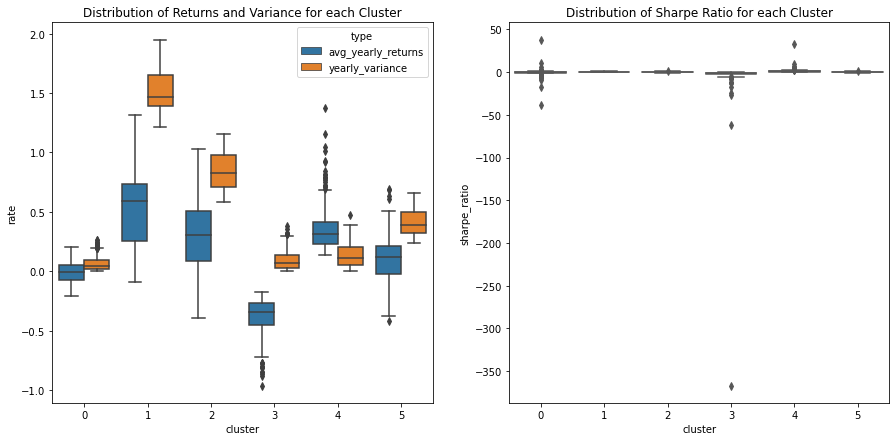

In [ ]:
cluster_perf(sub_cluster_transform, sub_cluster_sharpe_ratio)

In [ ]:
(
    second_trial_w_sharpe_ratio
    .groupby("cluster")
    .agg({"avg_yearly_returns": "mean", "yearly_variance": "mean", "sharpe_ratio": "mean", "Name": "count"})
    .reset_index()
)

,cluster,avg_yearly_returns,yearly_variance,sharpe_ratio,Name
0,0,-0.007581,0.063594,-inf,984
1,1,0.560519,1.522883,0.438709,40
2,2,0.284402,0.842208,0.299383,75
3,3,-0.380375,0.096733,-4.383169,208
4,4,0.359156,0.130867,1.406814,246
5,5,0.105799,0.408778,0.131822,204


In [ ]:
best_sub_cluster = second_trial.query("cluster == 4")

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


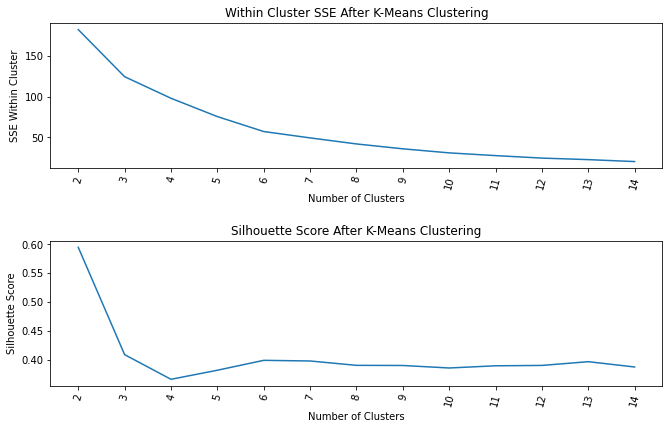

In [ ]:
plot_cluster(best_sub_cluster, max_loop=15)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


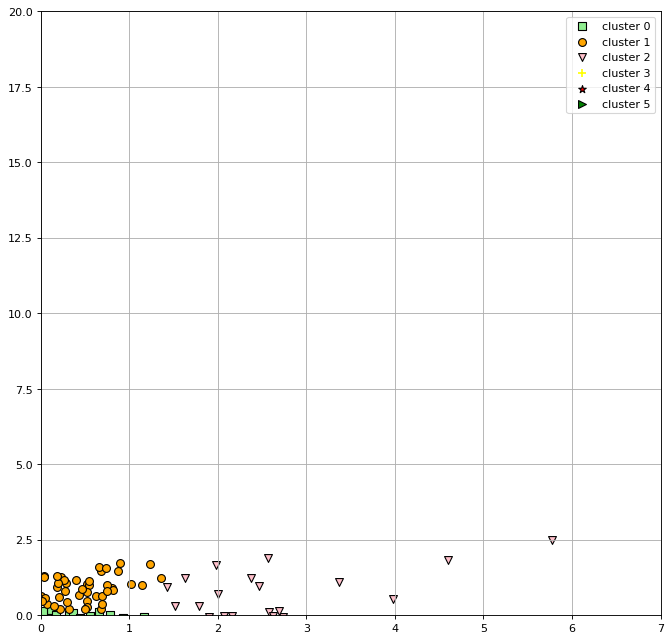

clustering performance
-----------------------------------
silhouette score: 0.41
sse withing cluster: 124.0


In [ ]:
third_trial = apply_cluster(best_sub_cluster, clusters=3)

In [ ]:
best_sub_cluster_perf = (    
    third_trial
    .groupby('cluster')
    .agg({"avg_yearly_returns":"mean", "yearly_variance":"mean", "Name":"count"})
    .sort_values('avg_yearly_returns')
    .reset_index()
)
best_sub_cluster_perf

,cluster,avg_yearly_returns,yearly_variance,Name
0,0,0.289101,0.067665,137
1,1,0.326611,0.224425,80
2,2,0.779880,0.171351,29


In [ ]:
third_trial_w_sharpe_ratio = get_sharpe_ratio_df(third_trial)

In [ ]:
best_sub_cluster_transform, best_sub_cluster_sharpe_ratio = get_transform_df(third_trial_w_sharpe_ratio)

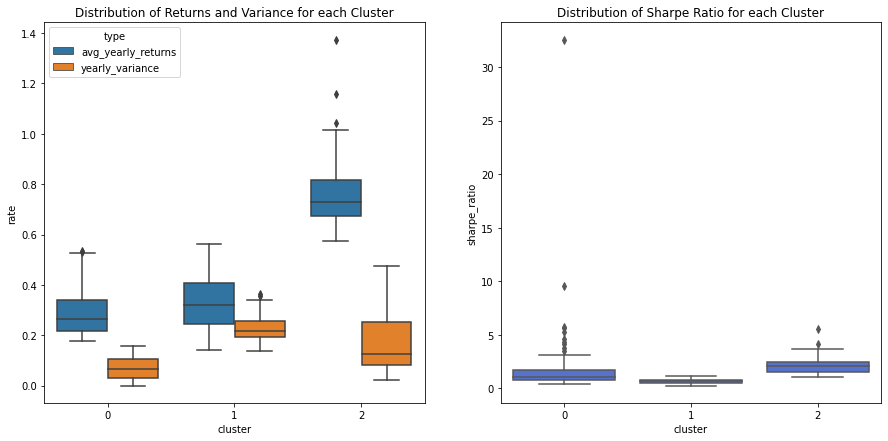

In [ ]:
cluster_perf(best_sub_cluster_transform, best_sub_cluster_sharpe_ratio)

We can see that cluster `3` has the best sharpe ratio distribution and a very impressive average returns of 79.3% and variance of 16.4% (over the last 3 years). This golden cluster of 27 stocks definitely captured my attention and I should focused my research on them and create a portfolio based on them.

In [ ]:
(
    third_trial_w_sharpe_ratio
    .groupby('cluster')
    .agg({"avg_yearly_returns": "mean", "yearly_variance": "mean", "sharpe_ratio": "mean", "Name": "count"})
    .reset_index()
)

,cluster,avg_yearly_returns,yearly_variance,sharpe_ratio,Name
0,0,0.289101,0.067665,1.677841,137
1,1,0.326611,0.224425,0.649311,80
2,2,0.779880,0.171351,2.216106,29


In [ ]:
third_trial.query("cluster == 2").Name.unique()

array(['AMD', 'AMED', 'ATLC', 'BLFS', 'CROX', 'DXCM', 'FATE', 'FIVN',
       'FRPT', 'HZNP', 'JYNT', 'LPSN', 'LULU', 'MRTX', 'NEO', 'NSSC',
       'NSTG', 'PCTY', 'PDEX', 'PODD', 'PTCT', 'QDEL', 'REGI', 'RGEN',
       'SPSC', 'STAA', 'VCYT', 'VICR', 'WIX'], dtype=object)

In [ ]:
third_trial_w_sharpe_ratio.query("cluster == 2").head(50)

,Name,avg_yearly_returns,yearly_variance,cluster,avg_risk_free_rate,std_dev,sharpe_ratio
81,AMD,1.044455,0.189414,2,0.021367,0.435217,2.350752
82,AMED,0.679726,0.215116,2,0.021367,0.463806,1.419471
135,ATLC,0.931367,0.271899,2,0.021367,0.521439,1.745171
202,BLFS,0.785077,0.126535,2,0.021367,0.355718,2.146954
384,CROX,0.692486,0.107479,2,0.021367,0.327839,2.047098
484,DXCM,0.794039,0.108452,2,0.021367,0.329321,2.346259
571,FATE,1.158355,0.379278,2,0.021367,0.615855,1.846194
606,FIVN,0.815347,0.103550,2,0.021367,0.321792,2.467373
640,FRPT,0.921197,0.069974,2,0.021367,0.264525,3.401683
794,HZNP,0.707861,0.107439,2,0.021367,0.327779,2.094381


In [ ]:
third_trial_w_sharpe_ratio.query("cluster == 2").to_csv('Best stocks cluster-2.csv', index = True)

In [ ]:
third_trial_w_sharpe_ratio.query("cluster == 2").sort_values(by=['sharpe_ratio'],ascending=False)

,Name,avg_yearly_returns,yearly_variance,cluster,avg_risk_free_rate,std_dev,sharpe_ratio
1105,NSTG,0.841255,0.022083,2,0.021367,0.148602,5.517324
1646,VCYT,1.015007,0.057058,2,0.021367,0.238869,4.159773
890,JYNT,0.728127,0.037189,2,0.021367,0.192844,3.664930
640,FRPT,0.921197,0.069974,2,0.021367,0.264525,3.401683
1335,RGEN,0.714409,0.058437,2,0.021367,0.241738,2.866914
1474,SPSC,0.604935,0.046052,2,0.021367,0.214596,2.719375
968,LULU,0.674161,0.057792,2,0.021367,0.240400,2.715447
606,FIVN,0.815347,0.103550,2,0.021367,0.321792,2.467373
81,AMD,1.044455,0.189414,2,0.021367,0.435217,2.350752
484,DXCM,0.794039,0.108452,2,0.021367,0.329321,2.346259


In [ ]:
third_trial_w_sharpe_ratio.to_csv('All_stock_with_sharpe_ratio.csv', index = True)